In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
names1 = [
'url',
'index',
'link',
'time',
'metro',  # метро
'square_meters_total',  # общая площадь
'square_meters_living',  # жилая площадь
'square_meters_kitchen',  # площадь кухни
'current_floor',  # этаж
'total_floors',  # всего этажей в доме
'city',  # город
                     'district',  # округ
                     'neighborhood',  # район
                     'street',  # улица
                     'house_number',  # дом
                     'time_to_metro_on_foot',  # время до метро пешком
                     'time_to_metro_by_transport',  # время до метро на транспорте
                     'number_of_bathrooms',  # кол-во санузлов
                     'is_combined_bathroom',  # совмещенный санузел
                     'is_separate_bathroom',  # раздельный санузел
                     'flat_type',  # тип жилья - Первичка и т д
                     'planning',  # планировка
                     'ceiling_height',  # высота потолков
                     'balcony_quantity',  # кол-во балконов
                     'loggia_quantity',  # кол-во лоджий
                     'repair',  # ремонт
                     'view',  # вид
                     'year_of_construction',  # год постройки
                     'house_type',  # тип дома
                     'overlap_type',  # тип перекрытий
                     'entrances_number',  # кол-во подъездов
                     'cargo_elevators_quantity',  # кол-во грузовых лифтов
                     'passengers_elevators_quantity',  # кол-во пассажирских лифтов
                     'heating',  # отопление
                     'accident_rate',  # аварийность
                     'parking',  # парковка
                     'garbage_chute',  # мусоропровод
                     'gas_suply',  # газоснабжение
                     'description',
                     'price']

In [47]:
df_full = pd.read_csv('flats_9csv.csv', names = names1)

In [12]:
df.head()

,url,index,link,time,metro,square_meters_total,square_meters_living,square_meters_kitchen,current_floor,total_floors,...,entrances_number,cargo_elevators_quantity,passengers_elevators_quantity,heating,accident_rate,parking,garbage_chute,gas_suply,description,price
0,https://www.cian.ru/cat.php?deal_type=sale&eng...,0,https://www.cian.ru/sale/flat/165558891/,2019-09-15 09:36:30,Кунцевская,148.0,69.0,31.0,4,15,...,3,2,2,Центральное,Нет,Подземная,Есть,NaN,Один из первых клубных домов Москвы. Застройщи...,37000000.0
1,https://www.cian.ru/cat.php?deal_type=sale&eng...,1,https://www.cian.ru/sale/flat/215305960/,2019-09-15 09:38:15,Таганская,60.0,32.1,9.3,12,16,...,3,1,1,Центральное,Нет,Наземная,Есть,NaN,"Продается от собственника жилья, без агентов и...",18000000.0
2,https://www.cian.ru/cat.php?deal_type=sale&eng...,2,https://www.cian.ru/sale/flat/217166102/,2019-09-15 09:40:04,Международная,50.3,0.0,0.0,77,97,...,0,2,2,NaN,NaN,Наземная,NaN,NaN,При 100% оплате данного апартамента или ипотек...,26600000.0
3,https://www.cian.ru/cat.php?deal_type=sale&eng...,3,https://www.cian.ru/sale/flat/212633712/,2019-09-15 09:42:04,Некрасовка,38.4,18.9,7.3,2,17,...,0,1,1,NaN,NaN,NaN,NaN,NaN,Квартира в шаговой доступности от метро Некра...,5202472.0
4,https://www.cian.ru/cat.php?deal_type=sale&eng...,4,https://www.cian.ru/sale/flat/216947898/,2019-09-15 09:43:56,Некрасовка,38.4,18.9,6.9,2,17,...,0,1,1,NaN,NaN,NaN,NaN,NaN,"Ипотека на выгодных условиях, поможем получить...",5202472.0


In [13]:
df = df.drop(['url','index','link','time','description'], axis =1 )

In [15]:
df.shape

(2144, 35)

In [16]:
from sklearn import preprocessing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 35 columns):
metro                            2048 non-null object
square_meters_total              2144 non-null float64
square_meters_living             2144 non-null float64
square_meters_kitchen            2144 non-null float64
current_floor                    2144 non-null int64
total_floors                     2144 non-null int64
city                             2123 non-null object
district                         2123 non-null object
neighborhood                     2123 non-null object
street                           2123 non-null object
house_number                     2144 non-null object
time_to_metro_on_foot            2144 non-null object
time_to_metro_by_transport       2144 non-null int64
number_of_bathrooms              2144 non-null int64
is_combined_bathroom             2144 non-null bool
is_separate_bathroom             2144 non-null bool
flat_type                        2

In [90]:
df['street'].value_counts() < 10

Дмитровское ш.                  False
наб. Пресненская                False
ул. Вертолетчиков               False
Зиларт жилой комплекс           False
ул. Лавриненко                  False
ул. Маршала Тимошенко           False
ул. Лобачевского                False
Мосфильмовская ул.              False
Покровская ул.                  False
просп. Мира                     False
Шлюзовая наб.                   False
Новочеремушкинская ул.          False
Котельническая наб.             False
12-я Парковая ул.               False
Рублевское ш.                   False
3-й Красносельский пер.         False
Никулинская ул.                 False
ул. Адмирала Макарова           False
Не определено                   False
ул. 3-я Ямского Поля            False
Ленинский просп.                False
ул. Сергея Макеева              False
Рождественская ул.              False
1-й Красногвардейский проезд    False
Садовническая ул.               False
Каширское ш.                    False
2-я Брестска

In [21]:
df['garbage_chute'] = df['garbage_chute'].fillna(value = 'Нет')

In [23]:
df['planning'] = df['planning'].fillna(value = 'Не определена')

In [25]:
df['gas_suply'] = df['gas_suply'].fillna(value = 'Не определено')

In [28]:
# Центральное 932 - если большая часть, то можно заполнить этим значением.

In [29]:
df['heating'] = df['heating'].fillna(value = 'Центральное')

In [32]:
df['parking'] = df['parking'].fillna(value = 'Не определена')

In [35]:
df = df.drop(['accident_rate'], axis =1 )

In [37]:
df['view'] = df['view'].fillna(value = 'Иной')

In [40]:
df['house_type'] = df['house_type'].fillna(value = 'Иной')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 34 columns):
metro                            2144 non-null object
square_meters_total              2144 non-null float64
square_meters_living             2144 non-null float64
square_meters_kitchen            2144 non-null float64
current_floor                    2144 non-null int64
total_floors                     2144 non-null int64
city                             2144 non-null object
district                         2144 non-null object
neighborhood                     2144 non-null object
street                           2144 non-null object
house_number                     2144 non-null object
time_to_metro_on_foot            2144 non-null object
time_to_metro_by_transport       2144 non-null int64
number_of_bathrooms              2144 non-null int64
is_combined_bathroom             2144 non-null bool
is_separate_bathroom             2144 non-null bool
flat_type                        2

In [43]:
df['overlap_type'] = df['overlap_type'].fillna(value = 'Железобетонные')

In [67]:
df_full[df_full['city'].isnull()][['city', 'street', 'district','neighborhood']]

,city,street,district,neighborhood
258,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN
263,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN


In [53]:
df_full[df_full['metro']]

AttributeError: 'Series' object has no attribute 'isfinite'

In [49]:
df['repair'] = df['repair'].fillna(value = 'Иной')

In [60]:
df['metro'] = df['metro'].fillna(value = 'Не определено')

In [63]:
df['flat_type'] = df['flat_type'].fillna(value = 'Вторичка')

In [69]:
df = df.fillna(value = 'Не определено') # заполнили все пропуски

In [84]:
df['price'].dtype == 'O'

False

In [118]:
df_O = []
for col in df.columns:
    if df[col].dtype == 'O':
        df_O.append(col)
        

In [119]:
df_O

['metro',
 'city',
 'district',
 'neighborhood',
 'street',
 'flat_type',
 'planning',
 'repair',
 'view',
 'house_type',
 'overlap_type',
 'heating',
 'parking',
 'garbage_chute',
 'gas_suply']

In [77]:
df.columns

Index(['metro', 'square_meters_total', 'square_meters_living',
       'square_meters_kitchen', 'current_floor', 'total_floors', 'city',
       'district', 'neighborhood', 'street', 'house_number',
       'time_to_metro_on_foot', 'time_to_metro_by_transport',
       'number_of_bathrooms', 'is_combined_bathroom', 'is_separate_bathroom',
       'flat_type', 'planning', 'ceiling_height', 'balcony_quantity',
       'loggia_quantity', 'repair', 'view', 'year_of_construction',
       'house_type', 'overlap_type', 'entrances_number',
       'cargo_elevators_quantity', 'passengers_elevators_quantity', 'heating',
       'parking', 'garbage_chute', 'gas_suply', 'price'],
      dtype='object')

In [120]:
df[df_O]

,metro,city,district,neighborhood,street,flat_type,planning,repair,view,house_type,overlap_type,heating,parking,garbage_chute,gas_suply
0,Кунцевская,Москва,ЗАО,р-н Можайский,Иное,Вторичка,Не определена,Евроремонт,Во двор,Монолитный,Железобетонные,Центральное,Подземная,Есть,Не определено
1,Таганская,Москва,ЦАО,р-н Таганский,Котельническая наб.,Вторичка,Смежная,Косметический,На улицу,Кирпичный,Железобетонные,Центральное,Наземная,Есть,Не определено
2,Международная,Москва,ЦАО,р-н Пресненский,наб. Пресненская,Вторичка Апартаменты,Не определена,Без ремонта,Иной,Иной,Железобетонные,Центральное,Наземная,Нет,Не определено
3,Некрасовка,Москва,ЮВАО,р-н Некрасовка,ул. Лавриненко,Вторичка,Не определена,Без ремонта,Иной,Иной,Железобетонные,Центральное,Не определена,Нет,Не определено
4,Некрасовка,Москва,ЮВАО,р-н Некрасовка,ул. Лавриненко,Вторичка,Не определена,Без ремонта,Во двор,Иной,Железобетонные,Центральное,Не определена,Нет,Не определено
5,Мичуринский проспект,Москва,ЗАО,р-н Раменки,ул. Лобачевского,Вторичка,Смежно-изолированная,Иной,Иной,Монолитный,Железобетонные,Центральное,Подземная,Нет,Не определено
6,Красносельская,Москва,ЦАО,р-н Красносельский,3-й Красносельский пер.,Вторичка Апартаменты,Не определена,Дизайнерский,Во двор,Иной,Железобетонные,Центральное,Наземная,Нет,Не определено
7,ЗИЛ,Москва,ЮАО,р-н Даниловский,Зиларт жилой комплекс,Вторичка,Не определена,Без ремонта,На улицу,Иной,Железобетонные,Центральное,Подземная,Нет,Не определено
8,Октябрьское поле,Москва,СЗАО,р-н Хорошево-Мневники,Иное,Вторичка,Изолированная,Дизайнерский,Во двор,Монолитный,Железобетонные,Индивидуальный тепловой пункт,Наземная,Есть,Не определено
9,ЗИЛ,Москва,ЮАО,р-н Даниловский,Зиларт жилой комплекс,Вторичка,Не определена,Без ремонта,На улицу,Иной,Железобетонные,Центральное,Подземная,Нет,Не определено


In [72]:
pd.get_dummies(df['gas_suply'])

,Автономное,Не определено,Центральное
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [99]:
rest_streets = set([st for st, val in (df['street'].value_counts() >= 10).reset_index().values if val == True])

In [102]:
df['street'] = df['street'].apply(ax)

In [100]:
def ax(x):
    if x in rest_streets:
        return x
    else:
        return 'Иное'

In [117]:
df['time_to_metro_on_foot'].value_counts()

0.0     442
10.0    282
12.0    157
9.0     147
8.0     136
5.0     124
7.0     100
17.0     95
15.0     79
6.0      76
3.0      73
11.0     68
13.0     51
2.0      43
14.0     42
1.0      36
20.0     35
18.0     23
4.0      21
19.0     20
24.0     17
22.0     15
25.0     13
21.0     11
16.0     10
23.0      6
32.0      5
30.0      4
33.0      2
27.0      2
45.0      2
37.0      1
40.0      1
28.0      1
31.0      1
57.0      1
26.0      1
98.0      1
Name: time_to_metro_on_foot, dtype: int64

In [104]:
# целимся в 200 факторов максимально


In [105]:
df = df.drop(['house_number'], axis =1 )

In [114]:
m = df_full[df_full['time_to_metro_on_foot'] != 'в']['time_to_metro_on_foot'].astype('int64').median()

In [116]:
df['time_to_metro_on_foot'] = df['time_to_metro_on_foot'].apply(t)

In [115]:
def t(x):
    if x == 'в':
        return m
    else:
        return int(x)
    

In [121]:
pd.get_dummies(df[df_O], prefix=df_O)

,metro_Авиамоторная,metro_Автозаводская,metro_Академическая,metro_Алексеевская,metro_Алма-Атинская,metro_Алтуфьево,metro_Аннино,metro_Арбатская,metro_Аэропорт,metro_Бабушкинская,...,parking_Многоуровневая,parking_Наземная,parking_Не определена,parking_Открытая,parking_Подземная,garbage_chute_Есть,garbage_chute_Нет,gas_suply_Автономное,gas_suply_Не определено,gas_suply_Центральное
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [124]:
df = pd.concat([df, pd.get_dummies(df[df_O], prefix=df_O)], axis = 1)
          


In [125]:
df = df.drop(df_O, axis = 1)

In [126]:
df.head()

,square_meters_total,square_meters_living,square_meters_kitchen,current_floor,total_floors,time_to_metro_on_foot,time_to_metro_by_transport,number_of_bathrooms,is_combined_bathroom,is_separate_bathroom,...,parking_Многоуровневая,parking_Наземная,parking_Не определена,parking_Открытая,parking_Подземная,garbage_chute_Есть,garbage_chute_Нет,gas_suply_Автономное,gas_suply_Не определено,gas_suply_Центральное
0,148.0,69.0,31.0,4,15,17.0,0,2,False,True,...,0,0,0,0,1,1,0,0,1,0
1,60.0,32.1,9.3,12,16,6.0,0,1,True,False,...,0,1,0,0,0,1,0,0,1,0
2,50.3,0.0,0.0,77,97,3.0,0,1,True,False,...,0,1,0,0,0,0,1,0,1,0
3,38.4,18.9,7.3,2,17,17.0,0,1,True,False,...,0,0,1,0,0,0,1,0,1,0
4,38.4,18.9,6.9,2,17,10.0,0,1,True,False,...,0,0,1,0,0,0,1,0,1,0


In [130]:
df['is_combined_bathroom'] = df['is_combined_bathroom'].astype('int64')

In [131]:
df['is_separate_bathroom'] = df['is_separate_bathroom'].astype('int64')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Columns: 455 entries, square_meters_total to gas_suply_Центральное
dtypes: float64(6), int64(12), uint8(437)
memory usage: 1.2 MB


C:\Users\mosco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


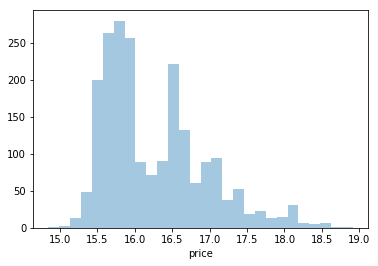

In [147]:
sns.distplot(np.log(df_final['price']), kde=False)

In [144]:
df_final = df.drop(df[df['price'] == 0.0].index, axis = 0)

In [149]:
df_final['price'] = np.log(df_final['price']) # уменьшаем разброс, так как распределение было неподходящее для модели , большой разброс, поэтому делаем логарифм

In [150]:
from sklearn import model_selection

In [151]:
df_train, df_test = model_selection.train_test_split(df_final, test_size = 0.1, random_state = 42)

In [152]:
df_train_target = df_train['price']
df_test_target = df_test['price']
df_train = df_train.drop(['price'], axis = 1)
df_test = df_test.drop(['price'], axis = 1)

In [153]:
from sklearn import ensemble
from sklearn import metrics

C:\Users\mosco\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [162]:
rf = ensemble.RandomForestRegressor(n_estimators=500, max_depth=10)

In [163]:
rf.fit(df_train, df_train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [164]:
metrics.r2_score(df_train_target, rf.predict(df_train))

0.97985051740157

In [167]:
metrics.r2_score(df_test_target, rf.predict(df_test))

0.9288821350054544

In [173]:
fl = df_test.iloc[0].values.reshape(1, -1)

In [175]:
np.exp(rf.predict(fl))

array([17504506.63910885])

In [179]:
np.exp(df_test_target.values[0])

19900000.0

In [180]:
#data leakage

In [181]:
feature_importance = rf.feature_importances_

In [182]:
feature_importance

array([5.80218793e-01, 4.88179037e-03, 6.48382133e-03, 4.62157337e-03,
       5.58898295e-03, 8.80888803e-03, 4.08371223e-03, 9.26775657e-04,
       2.07743437e-03, 2.45146708e-03, 1.97031028e-02, 8.11550600e-04,
       8.51290080e-04, 2.62178071e-03, 2.68082326e-03, 1.39022834e-03,
       1.22492707e-03, 1.76729803e-05, 4.49622474e-06, 1.71519869e-06,
       2.50884853e-07, 1.10187496e-07, 1.32627015e-05, 5.52642542e-06,
       5.25445850e-05, 2.92349591e-04, 1.09821927e-06, 5.21808531e-06,
       4.16796284e-07, 2.26759946e-06, 5.01620583e-05, 1.10536178e-05,
       1.11615787e-10, 9.28846244e-08, 3.06991734e-03, 7.58879129e-07,
       2.31423505e-08, 0.00000000e+00, 1.26436643e-06, 2.14228889e-06,
       2.13209624e-07, 4.80952327e-07, 1.32828675e-06, 2.80310061e-08,
       1.21129526e-04, 1.79047638e-05, 2.79367364e-08, 1.82125202e-07,
       4.22025625e-05, 6.81967488e-05, 0.00000000e+00, 5.28558979e-08,
       3.57877304e-08, 1.12292438e-05, 3.09868430e-06, 1.75958100e-05,
      

In [185]:
df_train.columns.values

array(['square_meters_total', 'square_meters_living',
       'square_meters_kitchen', 'current_floor', 'total_floors',
       'time_to_metro_on_foot', 'time_to_metro_by_transport',
       'number_of_bathrooms', 'is_combined_bathroom',
       'is_separate_bathroom', 'ceiling_height', 'balcony_quantity',
       'loggia_quantity', 'year_of_construction', 'entrances_number',
       'cargo_elevators_quantity', 'passengers_elevators_quantity',
       'metro_Авиамоторная', 'metro_Автозаводская', 'metro_Академическая',
       'metro_Алексеевская', 'metro_Алма-Атинская', 'metro_Алтуфьево',
       'metro_Аннино', 'metro_Арбатская', 'metro_Аэропорт',
       'metro_Бабушкинская', 'metro_Багратионовская', 'metro_Балтийская',
       'metro_Баррикадная', 'metro_Бауманская', 'metro_Беговая',
       'metro_Белокаменная', 'metro_Беломорская', 'metro_Белорусская',
       'metro_Беляево', 'metro_Бибирево', 'metro_Борисово',
       'metro_Боровское шоссе', 'metro_Ботанический сад',
       'metro_Братиславс

In [186]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
%matplotlib inline

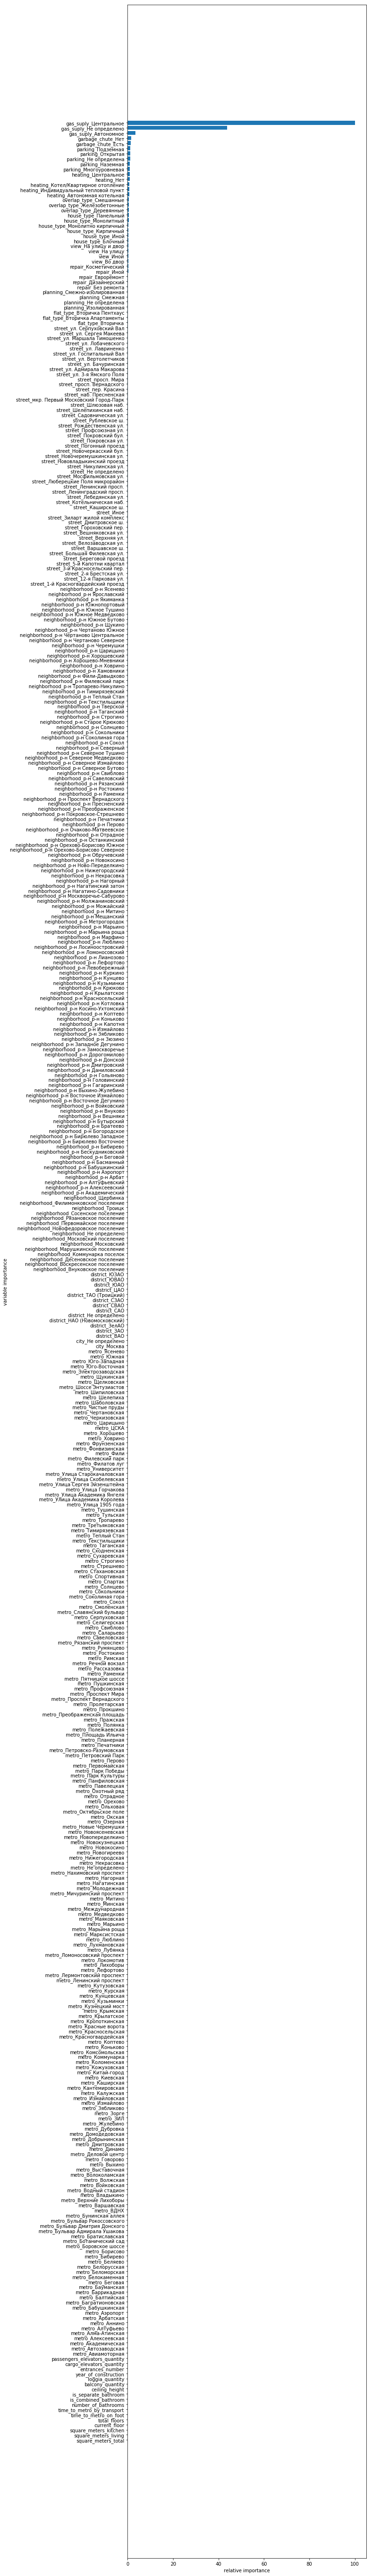

In [192]:
plt.figure(figsize=(20,100))

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_train.columns.values)
plt.xlabel('relative importance')
plt.ylabel('variable importance')
plt.show()

In [198]:
sorted(list(zip(rf.feature_importances_, df_train.columns)), reverse=True)

[(0.5802187926677749, 'square_meters_total'),
 (0.2535959111847903, 'district_ЦАО'),
 (0.019703102771882475, 'ceiling_height'),
 (0.008808888026549833, 'time_to_metro_on_foot'),
 (0.008352550042422522, 'repair_Дизайнерский'),
 (0.00648382132864803, 'square_meters_kitchen'),
 (0.006424134465406971, 'district_НАО (Новомосковский)'),
 (0.00640366789683526, 'district_ЗАО'),
 (0.006025316270740184, 'metro_Некрасовка'),
 (0.005936092199879947, 'neighborhood_р-н Некрасовка'),
 (0.005588982947729057, 'total_floors'),
 (0.004881790369825457, 'square_meters_living'),
 (0.004621573372860656, 'current_floor'),
 (0.004083712230579018, 'time_to_metro_by_transport'),
 (0.004049709225594419, 'street_Иное'),
 (0.003408513507590597, 'house_type_Иной'),
 (0.003069917335411142, 'metro_Белорусская'),
 (0.0027617709503953377, 'neighborhood_р-н Раменки'),
 (0.0026808232609233655, 'entrances_number'),
 (0.0026217807117759027, 'year_of_construction'),
 (0.0024514670773852195, 'is_separate_bathroom'),
 (0.00235

In [ ]:
# попробовать построить без квадратных метров